In [1]:
import numpy as np


In [2]:
import matplotlib as mpl

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scipy
import scipy.misc


In [5]:
import imageio

In [1]:
from PIL import Image

import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

(64, 64)


(20000, 64, 64)

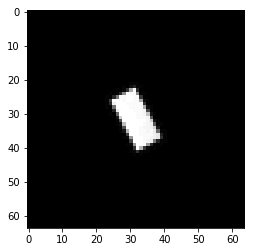

In [7]:
training_images = []
for i in range(0,20000):
    img = np.array(Image.open("./training_images/test" + str(i) +".png").convert(mode="L"))
    
    training_images.append(img)
    
print(training_images[100].shape)
plt.imshow(training_images[100], cmap=mpl.cm.binary, interpolation="nearest")
arr = np.array(training_images)
arr.shape

In [8]:
arr.shape


(20000, 64, 64)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import keras_tqdm as wtf
from keras_tqdm import TQDMNotebookCallback


Using TensorFlow backend.


In [ ]:
trainset = arr[:15000]

In [ ]:
trainset.shape

(15000, 64, 64)

In [ ]:
testset = arr[15000:]

In [ ]:
class_dict = {"Wing": 0, "Brick": 1, "Pole": 2}

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(64, 64)),
    keras.layers.Dense(150, activation=tf.nn.relu),
    keras.layers.Dense(3, activation=tf.nn.softmax)
])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
testset = testset/255.0

In [ ]:
trainset = trainset/255.0

In [ ]:
labels = np.zeros(20000)

i = 0
with open("./training_images/labels.txt") as fp:
    
    line = fp.readline()

    while line:
        
        parts = line.split()
        labels[i] = class_dict[parts[1]]
        line = fp.readline()
        i+=1
    
    
    

In [ ]:
testset[0,0,0]

0.25098039215686274

In [ ]:
labels

array([0., 0., 1., ..., 1., 2., 2.])

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
trainlabels = labels[:15000]
testlabels = labels[15000:]

In [ ]:
model.fit(trainset, trainlabels, epochs=5, verbose=0)#, callbacks=[TQDMNotebookCallback()])